In [3]:
from active_planner.py import ActivePlanner

ImportError: No module named 'sklearn'

In [24]:

from cv_bridge import CvBridge, CvBridgeError
from sklearn.gaussian_process import GaussianProcessRegressor 
from keras.applications.inception_v3 import InceptionV3
import tensorflow as tf
import sys
sys.path.remove('/opt/ros/kinetic/lib/python2.7/dist-packages') # in order to import cv2 under python3
import cv2
sys.path.append('/opt/ros/kinetic/lib/python2.7/dist-packages') # append back in order to import rospy
import rospy 
import message_filters
import argparse
from add_pts import PlanningGraph
from sensor_msgs.msg import Image
import path_plan as pp 
from sensor_msgs.msg import JointState
import numpy as np
import moveit_commander
import random
import threading 
import matplotlib.pyplot as plt
import pylab as pl
from IPython import display
from sklearn.gaussian_process.kernels import RBF
from keras.applications.inception_v3 import preprocess_input

In [ ]:
if __name__ == "__main__":

    parser = argparse.ArgumentParser()
    parser.add_argument("--vfile", default="test_graph_pts.npy", help="File path for saving vertices")
    parser.add_argument("--efile", default="test_graph_edges.npy", help="File path for saving edges")
    parser.add_argument("--robot_name", default="ur10", help="Name of robot")
    args, unknown_args = parser.parse_known_args()

    targets = ['liquid.jpg'] #, 'left0000.jpg']
    target_names = ['test_liquid'] #, 'torso']

    num_views = 5
    num_trials = 3

    for t, n in zip(targets, target_names):
        print("t, n: {}, {}".format(t, n))
        # send to initial position
        target_im = cv2.imread(t)
        #print(np.shape(np.array(target_im)))
        #print(target_im)
        cv2.imshow('target', target_im)
        ap = ActivePlanner(target_im, args.vfile, args.efile, args.robot_name, n, init_pose=None, visualize=True)

        for i in range(0, num_trials):
            print("trial: " + str(i))
            ap.run(num_views, cycle=False)
            ap.reset()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.remove('/opt/ros/kinetic/lib/python2.7/dist-packages') # in order to import cv2 under python3
import cv2
sys.path.append('/opt/ros/kinetic/lib/python2.7/dist-packages') # append back in order to import rospy
import csv
#import pandas as pd


In [34]:
file_prefix = "data/liquid"

#rewards = pd.read_csv(file_prefix + "_rewards.csv", sep=',',header=None)
rewards = np.genfromtxt(file_prefix + "_rewards.csv", delimiter=',')
trajectories = np.genfromtxt(file_prefix + "_trajectory.csv", delimiter=',')
# with open(file_prefix + "_rewards.csv") as rewards_file:
#     rewards = csv.reader(rewards_file, delimiter=',')
# #rewards = np.loadtxt(file_prefix + "_rewards.csv")
# #trajectories = np.load(file_prefix + "_trajectory.csv", allow_pickle=True)
# #images = np.load(file_prefix + "_images.csv")
# #
num_trials, ep_length = np.shape(rewards)
#     for row in rewards:
#         print(len(row))
        


    
    #rewards
    
np.shape(rewards)

ValueError: could not convert string to float: '0.8615744,0.7974598,0.7924931,0.846003,0.8876086,0.8428159,0.8452429,0.8452949,0.8481498,0.84677935,0.84268296,0.84241295,0.84383875,0.84674376,0.8951664,0.8907162,0.89737403,0.8953655,0.88831717,0.89128274'

In [ ]:
for i in range(num_trials):
    plt.figure()
    plt.title("Results for trial " + str(i+1))
    plt.xlabel("view number")
    plt.ylabel("reward")
    plt.plot(range(0, ep_length), rewards[i, :])

In [ ]:
plt.title("Average results over 10 trials")
plt.xlabel("view number")
plt.ylabel("reward")
plt.plot(range(0, ep_length), np.average(rewards, axis=0))

In [ ]:
def visualizeTrajectory(trial):
    for i in range(ep_length):
        print(trial)
        plt.figure()
        
        plt.title("Trial {} view {}: image index {}".format(trial, i+1, int(trajectories[trial - 1, i])))
        im = cv2.imread(file_prefix + "_t{}_v{}.jpg".format(trial, i))
        im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        plt.imshow(im, interpolation='nearest')

In [36]:
len([0.83317184,0.81336176,0.79289824,0.84546953,0.8899317,0.89612603,0.7821958,0.8928748,0.8928748,0.8928748,0.8889323,0.8889323,0.89495033,0.81944734,0.789674,0.799004,0.682453,0.919567,0.919567,0.71922016])

20

In [37]:
t4 = [0.8264,0.8264,0.8115617,0.79305816,0.7153486,0.8618826,0.8618826,0.8618826,0.73503995,0.83229625,0.8114709,0.823416,0.8437386,0.74809307,0.80056155,0.7299839,0.8305717,0.8003632,0.83317184,0.83317184]

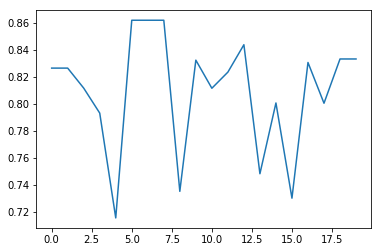

In [38]:
plt.plot(range(0, len(t4)), t4)